<a href="https://colab.research.google.com/github/VilPeas/TensorFlow/blob/main/NonLinearBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-Linear Binary Classification in TensorFlow
In this notebook we are going to look at building a non-linear binary classification model using sklearn make_circles(). This notebook builds off the understanding gained in [Linear vs Non-Linear Activation Functions](https://github.com/VilPeas/TensorFlow/blob/main/LinearVsNonLinearActivations.ipynb) i.e. that neural networks use a combination of straight lines (linear) and non-straight lines (non-linear) to find patterns in our data for classification problems.

# Steps in modelling with TensorFlow
These are the steps that we have to go through in creating a model.
1.   Prepare data (Import, inspect, visualise, split, shape)
2.   Build a model
3.   Compile the model
4.   Fit the model
5.   Evaluate the model
6.   Improving our model
---




# 1) Preparing the data
We are going to generate some data for this exercise using sklearn make_circles function.

In [105]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# Generating some data to view and fit.
from sklearn.datasets import make_circles

# Declare the number of circles
n_samples = 1000

# Create some samples
X, y = make_circles(n_samples, noise=0.03, random_state=42)

## Train test split

Let's create some training and test data from our initial dataset.

In [107]:
from sklearn.model_selection import train_test_split
# Create training and test data from original data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualising the data

Let's take a look at our data by plotting it to see what it is.

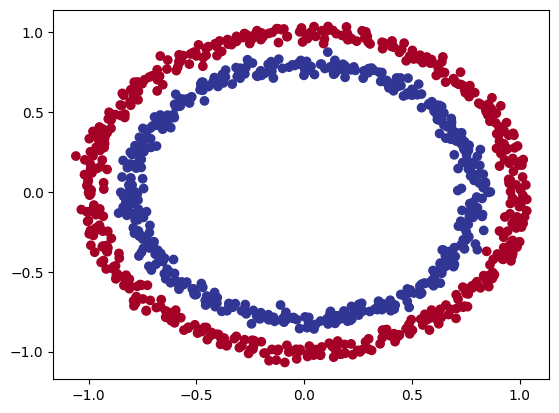

In [108]:
# Visualise with a plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

# 2) Build the model

Seeing that we're dealing with a non-linear problem we need to have non-linear activation functions (either "tanh", "sigmoid" or "relu") and seeing that we're dealing with a binary classification problem we need to have one output neuron in the output layer and this will have "sigmoid" activation on it (or "softmax" for multi-class problems).

In [93]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(1, activation="sigmoid") # Binary classification requires one output neuron
])

# 3) Compile the model
Using the model we just declared, let's compile the model now. Given that this is a binary classification problem we can therefore use BCE (binary cross-entropy) as our loss function.

In [99]:
# 2. Compile the model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 4) Fit the model
This is where we fit the model that we've just compiled.

In [100]:
# 3. Fit the model
model_history = model.fit(X_train, y_train, epochs=250, verbose=0)

# 5) Evaluate the model

In [101]:
# 4. Evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9950


[0.026973649859428406, 0.9950000047683716]

# Visualising the model

We're going to need to visualise our model so that we can see where our model is going wrong. We can do this by visualising the predictions that our model is making and having a look at the decision boundary.

These are the steps we need to take to do that:
* Take in a trained model of features (X) and labels (y).
* Create a meshgrid of the various "X" values.
* Make predictions accross the meshgrid.
* Plot the predictions and a line between the class zones.


In [102]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting "X".
  """
  # Define axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))
  X_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(X_in)

  # Check for multi-class labels
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


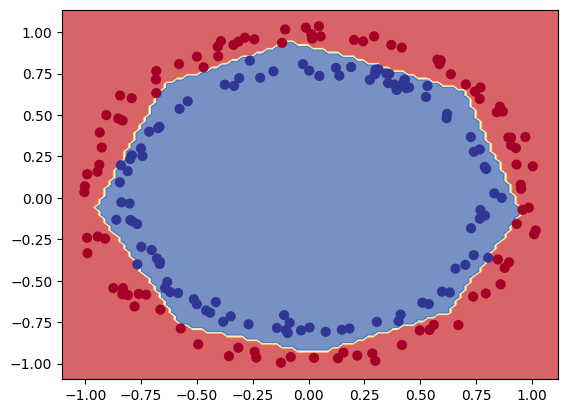

In [103]:
plot_decision_boundary(model=model, X=X_test, y=y_test)

# 6) Improving our model

The steps we can take to improve our model are:
* Add layers to the model
* Increase the number of hidden units
* Change activation functions
* Change optimiser function
* Fit on more data
* Fit for longer (more epochs)

In [110]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(1, activation="sigmoid") # Binary classification requires one output neuron
])

# 2. Compile the model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Changed learning rate from 0.001 to 0.01
                metrics=["accuracy"])

# 3. Fit the model
model_history = model.fit(X_train, y_train, epochs=25, verbose=0) # Reduced the number of epochs from 100 to 25

# 4. Evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9650


[0.184355691075325, 0.9649999737739563]

313/313 [==============================] - 1s 3ms/step
Doing binary classification
313/313 [==============================] - 1s 3ms/step
Doing binary classification


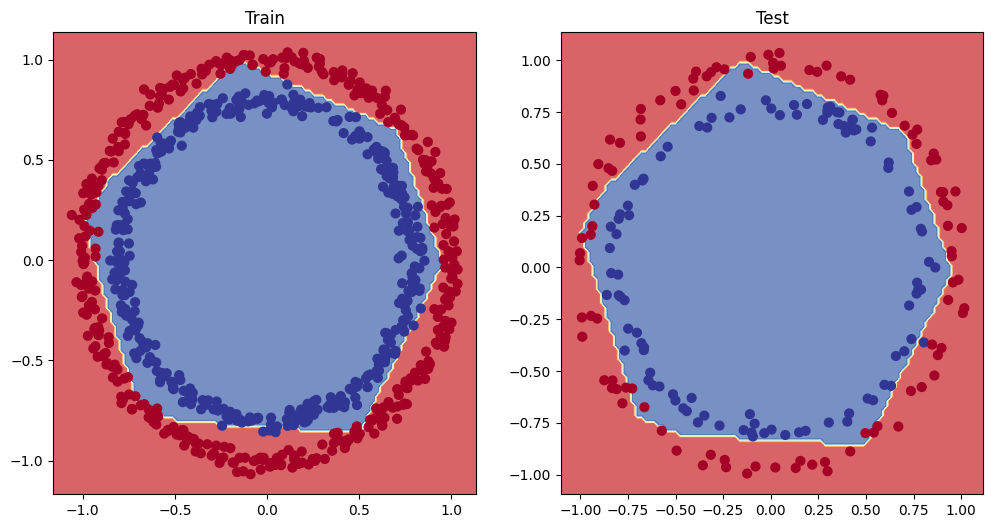

In [112]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()